[View in Colaboratory](https://colab.research.google.com/github/atilacaetano/TrabalhoProbabilidade/blob/master/Trabalho_prob.ipynb)

- Utilizar o dataset sobre eleições localizado na aula 17.

- Criar insights a partir da biblioteca Seaborn baseado no referido dataset. O número mínimo de figuras é cinco. A informação gerada é de livre escolha. 

- Documentar todo o código.

- Utilizar o colab para a codificação e Python 3.

- Trabalho individual.

- Criar um repositório no Github com todo os códigos gerados (deixar as células do notebook executadas). No arquivo README fazer um resumo sobre as conclusões encontradas no trabalho e identificação pessoal (nome, email). 

- Durante a submissão enviar apenas o link do repositório no Github

**DATASET ELEIÇÃO NO RN**

In [4]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving votacao_candidato_munzona_2018_RN.csv to votacao_candidato_munzona_2018_RN.csv
User uploaded file "votacao_candidato_munzona_2018_RN.csv" with length 34141232 bytes


**LENDO ARQUIVO CSV**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#leitura do arquivo
votacao_rn= pd.read_csv("votacao_candidato_munzona_2018_RN.csv",delimiter = ";", encoding='latin1')
#informaçoes gerais
votacao_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78432 entries, 0 to 78431
Data columns (total 38 columns):
DT_GERACAO                  78432 non-null object
HH_GERACAO                  78432 non-null object
ANO_ELEICAO                 78432 non-null int64
CD_TIPO_ELEICAO             78432 non-null int64
NM_TIPO_ELEICAO             78432 non-null object
NR_TURNO                    78432 non-null int64
CD_ELEICAO                  78432 non-null int64
DS_ELEICAO                  78432 non-null object
DT_ELEICAO                  78432 non-null object
TP_ABRANGENCIA              78432 non-null object
SG_UF                       78432 non-null object
SG_UE                       78432 non-null object
NM_UE                       78432 non-null object
CD_MUNICIPIO                78432 non-null int64
NM_MUNICIPIO                78432 non-null object
NR_ZONA                     78432 non-null int64
CD_CARGO                    78432 non-null int64
DS_CARGO                    78432 non-null objec

**EXCLUINDO COLUNAS INUTILIZÁVEIS**

In [6]:
#lista das colunas que não serão ultilizadas
col_desc = ['DT_GERACAO','HH_GERACAO','CD_MUNICIPIO','CD_CARGO','SQ_CANDIDATO','DS_SITUACAO_CANDIDATURA' 	,'DS_DETALHE_SITUACAO_CAND','NR_CANDIDATO','NM_CANDIDATO','CD_DETALHE_SITUACAO_CAND','CD_DETALHE_SITUACAO_CAND','NR_PARTIDO','SQ_COLIGACAO','NM_COLIGACAO','TP_AGREMIACAO','ANO_ELEICAO','CD_TIPO_ELEICAO','CD_SITUACAO_CANDIDATURA','NM_SOCIAL_CANDIDATO','NM_TIPO_ELEICAO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','NR_TURNO','TP_ABRANGENCIA','CD_SIT_TOT_TURNO'	,'SG_UF','SG_UE','NM_UE','ST_VOTO_EM_TRANSITO']
#delentando a lista acima
votacao_rn = votacao_rn.drop(col_desc,axis=1)

votacao_rn.head()

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,LAGOA DE VELHOS,19,Senador,GARIBALDI FILHO,MDB,Movimento Democrático Brasileiro,PDT / PP / MDB / PODE / DEM,NÃO ELEITO,863
1,TIMBAÚBA DOS BATISTAS,23,Deputado Estadual,DAGÔ,DEM,Democratas,PDT / PP / MDB / PODE / DEM,SUPLENTE,0
2,PORTALEGRE,63,Deputado Estadual,AGENTE FONTES,AVANTE,AVANTE,PRB / AVANTE,SUPLENTE,0
3,RIACHO DA CRUZ,63,Deputado Estadual,ANTONIO SERGIO,PSC,Partido Social Cristão,PATRI / PSL / PSC / DC / PPL,SUPLENTE,0
4,ENCANTO,65,Deputado Federal,LAWRENCE,SOLIDARIEDADE,Solidariedade,SOLIDARIEDADE / PSL / DC / PV / PSC,SUPLENTE,4


**QUANTIDADE DE VOTOS PARA CADA GOVERNADOR EM GERAL**

In [7]:
import numpy as np
import operator

#verifica se o cargo do candidato é o de governador e aloca o seu valor na variavel 'govs'
govs = votacao_rn.loc[votacao_rn['DS_CARGO'] == 'Governador']
#seleciona as colunas do nome do candidato e a quantidade de votos deste e atualiza o valor de'govs'
govs = govs[['NM_URNA_CANDIDATO','QT_VOTOS_NOMINAIS']]
#agrupando a quantidade de votos de cada candidato e colocando em ordem decrescente
total_govs = govs.groupby(['NM_URNA_CANDIDATO']).sum().sort_values(by=['QT_VOTOS_NOMINAIS'],ascending=False)
print(total_govs)

                          QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO                          
FATIMA BEZERRA                       748150
CARLOS EDUARDO                       525933
ROBINSON FARIA                       192037
BRENNO QUEIROGA                      106345
PROFESSOR CARLOS ALBERTO              31306
FREITAS JR                             9067
HERÓ BEZERRA                           4327
DÁRIO BARBOSA                          3379


In [8]:
#verifica se o cargo do candidato é de governador e se o numero da zona é 2 (Natal) e seleciona essas condições
govNatal = votacao_rn.query('DS_CARGO == "Governador" & NR_ZONA == 2')
#ordenando pela quantidade de votos nas zonas de natal
govNatal=govNatal.sort_values(by=['QT_VOTOS_NOMINAIS'],ascending=False)
govNatal

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
71801,NATAL,2,Governador,CARLOS EDUARDO,PDT,Partido Democrático Trabalhista,PDT / PP / MDB / PODE / DEM,2º TURNO,39970
42710,NATAL,2,Governador,FATIMA BEZERRA,PT,Partido dos Trabalhadores,PT / PC do B / PHS,2º TURNO,22120
8006,NATAL,2,Governador,ROBINSON FARIA,PSD,Partido Social Democrático,PRB / PTB / PR / PPS / PMB / PTC / PSB / PRP /...,NÃO ELEITO,7201
47791,NATAL,2,Governador,BRENNO QUEIROGA,SOLIDARIEDADE,Solidariedade,SOLIDARIEDADE / PV / DC / PSC / PSL / PATRI,NÃO ELEITO,7140
75142,NATAL,2,Governador,PROFESSOR CARLOS ALBERTO,PSOL,Partido Socialismo e Liberdade,PSOL,NÃO ELEITO,3525
22502,NATAL,2,Governador,FREITAS JR,REDE,Rede Sustentabilidade,REDE,NÃO ELEITO,573
57318,NATAL,2,Governador,DÁRIO BARBOSA,PSTU,Partido Socialista dos Trabalhadores Unificado,PSTU,NÃO ELEITO,332
20236,NATAL,2,Governador,HERÓ BEZERRA,PRTB,Partido Renovador Trabalhista Brasileiro,PRTB,NÃO ELEITO,328


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c6cedcc0>],
      dtype=object)

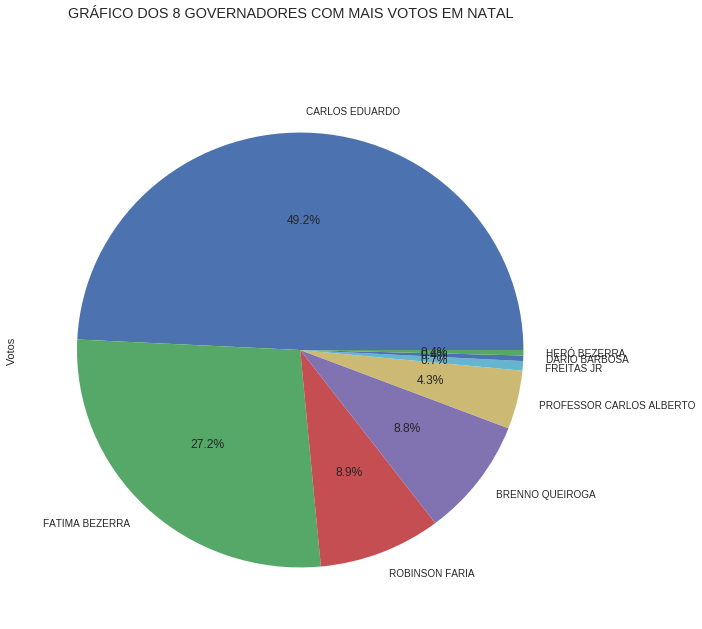

In [9]:
#importando o pandas
import pandas as pd

votos = list(govNatal['QT_VOTOS_NOMINAIS'])

#criando o grafico, passando os nomes nomes dos candidatos e a quantidade de votos de cada
df = pd.DataFrame(votos, index=list(govNatal['NM_URNA_CANDIDATO']), columns=['Votos'])
 
#plotando o grafico do tipo:pizza
df.plot(kind='pie', subplots=True, figsize=(10,10),autopct='%1.1f%%',legend=False,title='GRÁFICO DOS 8 GOVERNADORES COM MAIS VOTOS EM NATAL',)

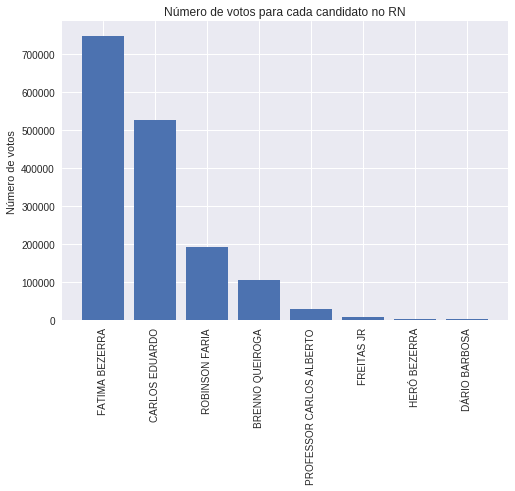

In [33]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns
# definindo as labels do grafico
LABELS = list(total_govs.index)

fig, ax = plt.subplots()
# criando o grafico de barra com os governadores com mais votos
plt.bar(list(range(8)), total_govs['QT_VOTOS_NOMINAIS'], tick_label=LABELS)

ax.set_xticklabels(LABELS,rotation=90)
ax.set_ylabel('Número de votos')
ax.set_title('Número de votos para cada candidato no RN')
plt.show()

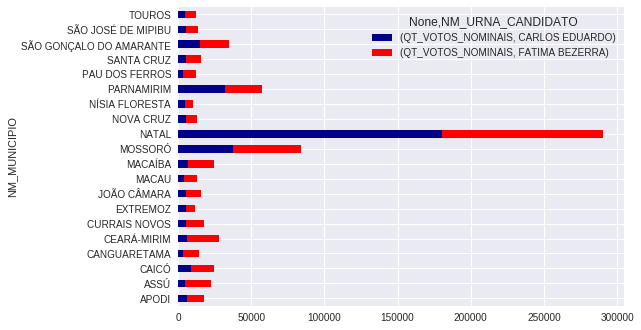

In [44]:
#agrupando a quantidade de votos por cidade e selecionando as cidades com maior numero de eleitores
cidades_max = votacao_rn.groupby(['NM_MUNICIPIO']).QT_VOTOS_NOMINAIS.sum().sort_values(ascending=False)
#quantidade de cidades para ser mostrado (os 20 municipios com mais eleitores)
cidades_max=cidades_max.head(20)
#selecionar apenas as cidades com mais eleitores no dataframe da votação do 2 turno 
turno2=votacao_rn[votacao_rn['NM_MUNICIPIO'].isin(cidades_max.index)]
turno2 = turno2.query("DS_SIT_TOT_TURNO == '2º TURNO'")
turno2 = turno2[['NM_MUNICIPIO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]
#cria uma pivot table pra aninhar os nomes da cidade com os votos para cada candidato
resultado = turno2.pivot_table(index='NM_MUNICIPIO', columns='NM_URNA_CANDIDATO', aggfunc='sum')

resultado.plot(kind='barh', stacked=True,color=['darkblue','red'])
plt.show()

**QUANTIDADE DE VOTOS NA COLIGAÇÃO PARA CANDIDATOS A DEP. ESTADUAL**

In [63]:
import numpy as np
import operator

#verifica se o cargo do candidato é o de deputado estadual e aloca o seu valor na variavel 'depEst'
depEst = votacao_rn.loc[votacao_rn['DS_CARGO'] == 'Deputado Estadual']
#seleciona as colunas da coligação do candidato e a quantidade de votos dele e atualiza o valor de'depEst'
depEst = depEst[['DS_COMPOSICAO_COLIGACAO','QT_VOTOS_NOMINAIS']]
#agrupando a quantidade de votos de cada coligação e colocando em ordem decrescente
total_coligacao = depEst.groupby(['DS_COMPOSICAO_COLIGACAO']).sum().sort_values(by=['QT_VOTOS_NOMINAIS'],ascending=False)
total_coligacao

,QT_VOTOS_NOMINAIS
DS_COMPOSICAO_COLIGACAO,
PR / PSB / PSDB / PSD / PROS,585044
PDT / PP / MDB / PODE / DEM,186089
PT / PC do B / PHS,183508
PV / SOLIDARIEDADE,140355
PATRI / PSL / PSC / DC / PPL,139521
PTB / PPS / PMB / PTC / PRP,129204
PRB / AVANTE,121175
PSOL,68203
REDE,8223


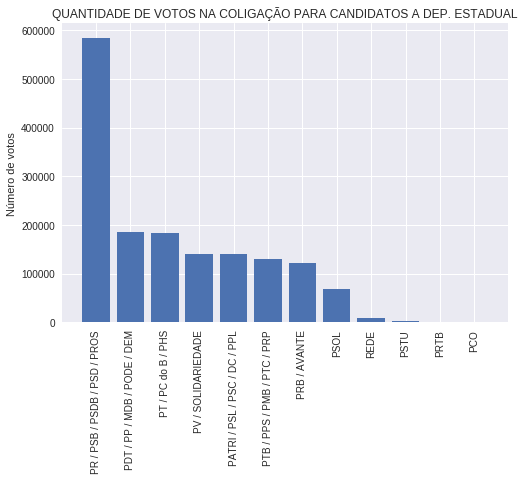

In [64]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns
# definindo as labels do grafico
LABELS = list(total_coligacao.index)

fig, ax = plt.subplots()
# criando o grafico de barra com as coligações com mais votos
plt.bar(list(range(12)), total_coligacao['QT_VOTOS_NOMINAIS'], tick_label=LABELS)

ax.set_xticklabels(LABELS,rotation=90)
ax.set_ylabel('Número de votos')
ax.set_title('QUANTIDADE DE VOTOS NA COLIGAÇÃO PARA CANDIDATOS A DEP. ESTADUAL')
plt.show()

In [65]:
import numpy as np
import operator

#verifica se o cargo do candidato é o de deputado estadual e aloca o seu valor na variavel 'depEst'
depEst = votacao_rn.loc[votacao_rn['DS_CARGO'] == 'Deputado Estadual']

#seleciona as colunas do partido do candidato e a quantidade de votos dele e atualiza o valor de'depEst'
depEst = depEst[['SG_PARTIDO','QT_VOTOS_NOMINAIS']]

#agrupando a quantidade de votos de cada partido e colocando em ordem decrescente
total_depEst = depEst.groupby(['SG_PARTIDO']).sum().sort_values(by=['QT_VOTOS_NOMINAIS'],ascending=False)
total_depEst

,QT_VOTOS_NOMINAIS
SG_PARTIDO,
PSDB,277177
PSD,163033
SOLIDARIEDADE,134065
MDB,118307
PT,105710
PR,91766
AVANTE,86346
PSL,69114
PSOL,68203


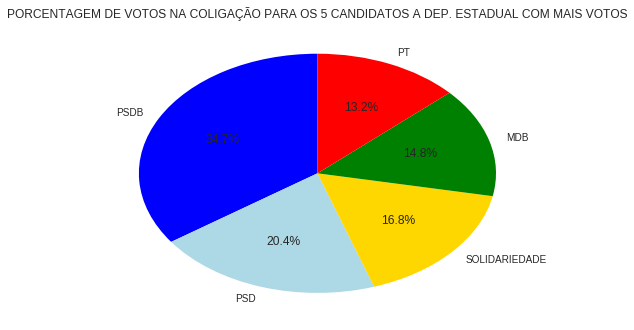

In [66]:
total_depEst = total_depEst.head(5)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

#definindo as labels do grafico ()
labels = list(total_depEst.index)
#definindo os valores (quantidade de votos) usados
sizes = total_depEst['QT_VOTOS_NOMINAIS']
#setando as cores para cada label
colors = ['blue','lightblue','gold','green','red']
 
# Plotando  o grafico
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)

ax.set_title("PORCENTAGEM DE VOTOS NA COLIGAÇÃO PARA OS 5 CANDIDATOS A DEP. ESTADUAL COM MAIS VOTOS")
plt.show()

**DATA SET DA ELEIÇÃO NO BRASIL**

In [31]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving votacao_candidato_munzona_2018_BR.csv to votacao_candidato_munzona_2018_BR (1).csv
User uploaded file "votacao_candidato_munzona_2018_BR.csv" with length 33446861 bytes


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
#lendo o arquivo csv
votacao_br= pd.read_csv("votacao_candidato_munzona_2018_BR.csv",sep = ";", encoding='latin1')
#visualizar as informações gerais do arqv
votacao_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81549 entries, 0 to 81548
Data columns (total 38 columns):
DT_GERACAO                  81549 non-null object
HH_GERACAO                  81549 non-null object
ANO_ELEICAO                 81549 non-null int64
CD_TIPO_ELEICAO             81549 non-null int64
NM_TIPO_ELEICAO             81549 non-null object
NR_TURNO                    81549 non-null int64
CD_ELEICAO                  81549 non-null int64
DS_ELEICAO                  81549 non-null object
DT_ELEICAO                  81549 non-null object
TP_ABRANGENCIA              81549 non-null object
SG_UF                       81549 non-null object
SG_UE                       81549 non-null object
NM_UE                       81549 non-null object
CD_MUNICIPIO                81549 non-null int64
NM_MUNICIPIO                81549 non-null object
NR_ZONA                     81549 non-null int64
CD_CARGO                    81549 non-null int64
DS_CARGO                    81549 non-null objec

In [79]:
#lista das colunas que não serão ultilizadas
col_inut = ['DT_GERACAO','HH_GERACAO','CD_MUNICIPIO','CD_CARGO','DS_SITUACAO_CANDIDATURA','SQ_CANDIDATO','NR_CANDIDATO','NM_CANDIDATO','CD_DETALHE_SITUACAO_CAND','CD_DETALHE_SITUACAO_CAND','NR_PARTIDO','SQ_COLIGACAO','NM_COLIGACAO','TP_AGREMIACAO','ANO_ELEICAO','CD_TIPO_ELEICAO','CD_SITUACAO_CANDIDATURA','NM_SOCIAL_CANDIDATO','NM_TIPO_ELEICAO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','NR_TURNO','TP_ABRANGENCIA','DS_COMPOSICAO_COLIGACAO'	,'CD_SIT_TOT_TURNO'	,'SG_UF','SG_UE','NM_UE','ST_VOTO_EM_TRANSITO']
#deletando a lista de colunas acima
votacao_br = votacao_br.drop(col_inut,axis=1)

votacao_br

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,NM_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,JAPONVAR,50,Presidente,GUILHERME BOULOS,DEFERIDO,PSOL,Partido Socialismo e Liberdade,NÃO ELEITO,10
1,GROAÍRAS,65,Presidente,CABO DACIOLO,DEFERIDO,PATRI,Patriota,NÃO ELEITO,33
2,ILHÉUS,26,Presidente,MARINA SILVA,DEFERIDO,REDE,Rede Sustentabilidade,NÃO ELEITO,691
3,MORRO GRANDE,42,Presidente,MARINA SILVA,DEFERIDO,REDE,Rede Sustentabilidade,NÃO ELEITO,5
4,OSÓRIO,77,Presidente,GERALDO ALCKMIN,DEFERIDO,PSDB,Partido da Social Democracia Brasileira,NÃO ELEITO,1346
5,MARILENA,96,Presidente,JAIR BOLSONARO,DEFERIDO,PSL,Partido Social Liberal,2º TURNO,1553
6,SÃO BERNARDO DO CAMPO,414,Presidente,CIRO GOMES,DEFERIDO,PDT,Partido Democrático Trabalhista,NÃO ELEITO,7612
7,COQUEIROS DO SUL,15,Presidente,CIRO GOMES,DEFERIDO,PDT,Partido Democrático Trabalhista,NÃO ELEITO,171
8,SARANDI,83,Presidente,ALVARO DIAS,DEFERIDO,PODE,Podemos,NÃO ELEITO,83
9,PIQUEROBI,117,Presidente,JOÃO GOULART FILHO,DEFERIDO,PPL,Partido Pátria Livre,NÃO ELEITO,0


In [80]:
import numpy as np

presidente = votacao_br.loc[votacao_br['DS_CARGO'] == 'Presidente']

presidente = presidente[['NM_URNA_CANDIDATO','QT_VOTOS_NOMINAIS', 'NM_MUNICIPIO']]

total_pres = presidente.groupby(['NM_URNA_CANDIDATO']).sum().sort_values(by=['QT_VOTOS_NOMINAIS'],ascending=False)
total_pres

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
JAIR BOLSONARO,49276990
FERNANDO HADDAD,31342005
CIRO GOMES,13344366
GERALDO ALCKMIN,5096349
JOÃO AMOÊDO,2679744
CABO DACIOLO,1348323
HENRIQUE MEIRELLES,1288948
MARINA SILVA,1069577
ALVARO DIAS,859601


**GRÁFICO DOS 8 CANDIDATOS A PRESIDENCIA MAIS VOTADOS**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c11c1710>],
      dtype=object)

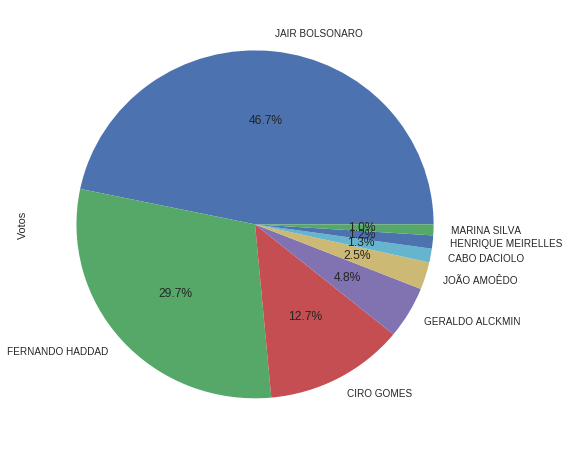

In [81]:
#definindo a variavel total_pres como os 8 
total_pres = total_pres.head(8)

# library
import pandas as pd
#definindo  
votos = list(total_pres['QT_VOTOS_NOMINAIS'])

#criando o grafico, passando os nomes nomes dos candidatos e a quantidade de votos de cada
df = pd.DataFrame(votos, index=list(total_pres.index), columns=['Votos'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8,8),autopct='%1.1f%%',legend=False)

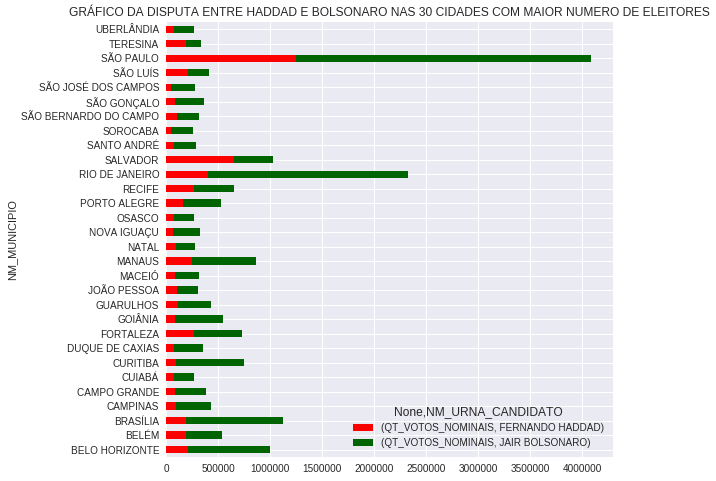

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

#agrupando a quantidade de votos por cidade e selecionando as cidades com maior numero de eleitores
cidades_max = votacao_br.groupby(['NM_MUNICIPIO']).QT_VOTOS_NOMINAIS.sum().sort_values(ascending=False)

#quantidade de cidades para ser mostrado (as 30 cidades com mais eleitores)
cidades_max=cidades_max.head(30)

#selecionar apenas as cidades com mais eleitores no dataframe da votação do 2 turno 
turno2=votacao_br[votacao_br['NM_MUNICIPIO'].isin(cidades_max.index)]
turno2 = turno2.query("DS_SIT_TOT_TURNO == '2º TURNO'")
turno2 = turno2[['NM_MUNICIPIO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]

#cria uma pivot table pra aninhar os nomes da cidade com os votos para cada candidato
resultado = turno2.pivot_table(index='NM_MUNICIPIO', columns='NM_URNA_CANDIDATO', aggfunc='sum')
#plota o grafico
resultado.plot(kind='barh', stacked=True,color=['red','darkgreen'],figsize=(8,8),title='GRÁFICO DA DISPUTA ENTRE HADDAD E BOLSONARO NAS 30 CIDADES COM MAIOR NUMERO DE ELEITORES')
plt.show()